In [1]:
file1 = '../szkoly.xlsx'
file2 = '../ludnosc/tabela12.xls'
file3 = '../ludnosc/tabela01.xls'
differences_file = '../nowe_gminy.csv'

## Final assignment
Calculate in Python basic statistics like min/average/max number of:
 * students per teacher broken down by the type of school,
 * students per school broken down by their year of birth,
 
in each district (polish ‘gmina’) and in total for cities and rural districts.

In [2]:
from schoolstat.prepare_tables import tables
from time import time

In [3]:
t1 = time()
schools, dist_popul, popul = tables(file1, file2, file3, 2018, 2020, 2020, differences_file)
print(time()-t1)

181.32127904891968


In [4]:
print(schools.shape)
schools.head()

(41542, 11)


,Województwo,Gmina,Typ gminy,Miejscowość,Nazwa typu,Regon,"Uczniowie, wychow., słuchacze",Regon jednostki sprawozdawczej,Nauczyciele,Liczba uczniów na nauczyciela,Miasto czy wieś
Lp.,,,,,,,,,,,
1,WOJ. DOLNOŚLĄSKIE,Bolesławiec,M,Bolesławiec,Przedszkole,02127059400000,125,02127059400000,12.01,10.407993,M
2,WOJ. DOLNOŚLĄSKIE,Bolesławiec,M,Bolesławiec,Przedszkole,02127060200000,122,02127060200000,9.09,13.421342,M
3,WOJ. DOLNOŚLĄSKIE,Bolesławiec,M,Bolesławiec,Przedszkole,02127062500000,125,02127062500000,13.00,9.615385,M
4,WOJ. DOLNOŚLĄSKIE,Bolesławiec,M,Bolesławiec,Przedszkole,02127065400000,125,02127065400000,10.09,12.388503,M
5,WOJ. DOLNOŚLĄSKIE,Bolesławiec,M,Bolesławiec,Przedszkole,02127067700000,73,02127067700000,7.09,10.296192,M


In [5]:
print(dist_popul.shape)
dist_popul.head()

(31713, 6)


,Województwo,Gmina,Rok urodzenia,Liczba osób,Liczba szkół,Liczba uczniów na szkołę
0,WOJ. DOLNOŚLĄSKIE,Bardo,2004,41,2,20.5
1,WOJ. DOLNOŚLĄSKIE,Bardo,2005,46,2,23.0
2,WOJ. DOLNOŚLĄSKIE,Bardo,2006,55,2,27.5
3,WOJ. DOLNOŚLĄSKIE,Bardo,2007,53,2,26.5
4,WOJ. DOLNOŚLĄSKIE,Bardo,2008,47,2,23.5


In [6]:
print(popul.shape)
popul

(34, 5)


,Liczba osób,Rok urodzenia,Miasto czy wieś,Liczba szkół,Liczba uczniów na szkołę
0,217469,2015,M,5010,43.406986
1,214429,2014,M,5010,42.800200
2,217092,2013,M,5010,43.331737
3,223808,2012,M,5010,44.672255
4,229807,2011,M,8673,26.496829
5,239073,2010,M,8673,27.565202
6,242206,2009,M,8673,27.926438
7,231709,2008,M,8673,26.716131
8,216987,2007,M,8673,25.018679
9,206846,2006,M,8673,23.849418


In [7]:
from schoolstat.stats import group_students_per_teacher, students_per_school, group_students_per_school, filter_stats

### students per teacher broken down by the type of school, in each district

In [8]:
d1 = group_students_per_teacher(schools, 'Gmina')
d1

avg        min  \
Gmina     Nazwa typu                Województwo                               
Abramów   Gimnazjum                 WOJ. LUBELSKIE     10.426540  10.426540   
          Przedszkole               WOJ. LUBELSKIE     10.970280  10.970280   
          Szkoła podstawowa         WOJ. LUBELSKIE      7.933681   4.961021   
Adamów    Branżowa szkoła I stopnia WOJ. LUBELSKIE     10.000000  10.000000   
          Gimnazjum                 WOJ. LUBELSKIE      7.405401   5.112108   
...                                                          ...        ...   
Żórawina  Szkoła podstawowa         WOJ. DOLNOŚLĄSKIE   7.314614   4.392765   
Żółkiewka Gimnazjum                 WOJ. LUBELSKIE      3.894195   3.894195   
          Szkoła podstawowa         WOJ. LUBELSKIE      9.080483   6.244175   
          Szkoła policealna         WOJ. LUBELSKIE      8.972772   8.972772   
          Technikum                 WOJ. LUBELSKIE      8.972772   8.972772   

                                                             max  number  
Gmina     Nazwa typu                Województwo                           
Abramów   Gimnazjum                 WOJ. LUBELSKIE     10.426540       1  
          Przedszkole               WOJ. LUBELSKIE     10.970280       1  
          Szkoła podstawowa         WOJ. LUBELSKIE     10.970280       3  
Adamów    Branżowa szkoła I stopnia WOJ. LUBELSKIE     10.000000       1  
          Gimnazjum                 WOJ. LUBELSKIE      9.520322       3  
...                                                          ...     ...  
Żórawina  Szkoła podstawowa         WOJ. DOLNOŚLĄSKIE   9.207015       5  
Żółkiewka Gimnazjum                 WOJ. LUBELSKIE      3.894195       1  
          Szkoła podstawowa         WOJ. LUBELSKIE     11.916790       2  
          Szkoła policealna         WOJ. LUBELSKIE      8.972772       1  
          Technikum                 WOJ. LUBELSKIE      8.972772       1  

[10259 rows x 4 columns]

In [9]:
filter_stats(d1, 'Świdnik')

,,avg,min,max,number
Nazwa typu,Województwo,,,,
Branżowa szkoła I stopnia,WOJ. LUBELSKIE,7.931657,6.632544,9.230769,2
Liceum ogólnokształcące,WOJ. LUBELSKIE,63.612495,9.230769,223.809524,4
Przedszkole,WOJ. LUBELSKIE,9.247456,2.000000,17.445483,12
Specjalny Ośrodek Szkolno-Wychowawczy,WOJ. LUBELSKIE,2.285041,2.285041,2.285041,1
Sześcioletnia szkoła muzyczna I stopnia,WOJ. LUBELSKIE,7.498857,7.498857,7.498857,1
Szkoła podstawowa,WOJ. LUBELSKIE,8.802765,2.285041,11.644627,6
Szkoła policealna,WOJ. LUBELSKIE,100.000000,100.000000,100.000000,1
Szkoła specjalna przysposabiająca do pracy,WOJ. LUBELSKIE,2.285041,2.285041,2.285041,1
Technikum,WOJ. LUBELSKIE,7.931657,6.632544,9.230769,2


In [10]:
filter_stats(d1, i2='Liceum ogólnokształcące')

,,,avg,min,max,number
Gmina,Nazwa typu,Województwo,,,,
Adamów,Liceum ogólnokształcące,WOJ. LUBELSKIE,10.000000,10.000000,10.000000,2
Aleksandrów Kujawski,Liceum ogólnokształcące,WOJ. KUJAWSKO-POMORSKIE,26.910709,8.176975,62.790698,3
Aleksandrów Łódzki,Liceum ogólnokształcące,WOJ. ŁÓDZKIE,8.496979,5.980318,10.110294,3
Andrespol,Liceum ogólnokształcące,WOJ. ŁÓDZKIE,10.044360,10.044360,10.044360,1
Andrychów,Liceum ogólnokształcące,WOJ. MAŁOPOLSKIE,19.749606,11.991435,23.628692,3
...,...,...,...,...,...,...
Żukowo,Liceum ogólnokształcące,WOJ. POMORSKIE,15.600797,15.600797,15.600797,1
Żuromin,Liceum ogólnokształcące,WOJ. MAZOWIECKIE,9.951771,9.118236,10.785305,2
Żychlin,Liceum ogólnokształcące,WOJ. ŁÓDZKIE,5.542453,5.542453,5.542453,1


### students per teacher broken down by the type of school, in total for cities and rural districts

In [11]:
d2 = group_students_per_teacher(schools, 'Miasto czy wieś')
d2

avg  \
Miasto czy wieś Nazwa typu                                                       
M               Bednarska Szkoła Realna                               6.741573   
                Branżowa szkoła I stopnia                             9.985987   
                Czteroletnia szkoła muzyczna I stopnia               10.942861   
                Czteroletnia szkoła muzyczna II stopnia              11.624746   
                Czteroletnie liceum plastyczne                        6.323440   
                Dziewięcioletnia ogólnokształcąca szkoła baletowa     5.582086   
                Dziewięcioletnia szkoła sztuki tańca                 27.130435   
                Gimnazjum                                            11.198348   
                Kolegium Pracowników Służb Społecznych               10.503735   
                Liceum ogólnokształcące                              65.244960   
                Młodzieżowy Ośrodek Socjoterapii ze szkołami          4.151921   
                Młodzieżowy Ośrodek Wychowawczy                       3.622563   
                Ogólnokształcąca szkoła muzyczna I stopnia            4.884474   
                Ogólnokształcąca szkoła muzyczna II stopnia           4.444007   
                Ośrodek Rewalidacyjno-Wychowawczy umożliwiający...    3.084316   
                Poznańska szkoła chóralna                             3.786541   
                Przedszkole                                          11.364660   
                Punkt przedszkolny                                   14.702396   
                Specjalny Ośrodek Szkolno-Wychowawczy                 2.573005   
                Specjalny Ośrodek Wychowawczy                         3.534037   
                Sześcioletnia ogólnokształcąca szkoła sztuk pię...    5.481909   
                Sześcioletnia szkoła muzyczna I stopnia               8.754244   
                Sześcioletnia szkoła muzyczna II stopnia              6.371011   
                Sześcioletnia szkoła sztuki tańca                    50.185794   
                Szkoła podstawowa                                    10.204294   
                Szkoła policealna                                   177.494064   
                Szkoła policealna muzyczna                            9.650227   
                Szkoła policealna plastyczna                         58.016721   
                Szkoła specjalna przysposabiająca do pracy            2.598487   
                Technikum                                            10.519761   
                Zespół wychowania przedszkolnego                     10.941416   
W               Branżowa szkoła I stopnia                             7.731173   
                Czteroletnia szkoła muzyczna I stopnia               34.090909   
                Czteroletnie liceum plastyczne                        5.561019   
                Gimnazjum                                             7.290574   
                Liceum ogólnokształcące                              72.350016   
                Młodzieżowy Ośrodek Socjoterapii ze szkołami          4.156476   
                Młodzieżowy Ośrodek Wychowawczy                       3.289813   
                Ogólnokształcąca szkoła muzyczna II stopnia           2.094241   
                Ośrodek Rewalidacyjno-Wychowawczy umożliwiający...    2.712661   
                Przedszkole                                          11.387280   
                Punkt przedszkolny                                   15.117852   
                Specjalny Ośrodek Szkolno-Wychowawczy                 2.702861   
                Specjalny Ośrodek Wychowawczy                         3.850662   
                Sześcioletnia szkoła muzyczna I stopnia               8.379625   
                Sześcioletnia szkoła muzyczna II stopnia              6.501666   
                Szkoła podstawowa                                     8.984887   
                Szkoła policealna                        

In [12]:
filter_stats(d2, i2='Przedszkole')

,,avg,min,max,number
Miasto czy wieś,Nazwa typu,,,,
M,Przedszkole,11.36466,0.500000,1600.0,8499
W,Przedszkole,11.38728,0.727273,700.0,4054


### students per school broken down by their year of birth, in each district

In [13]:
d3 = students_per_school(dist_popul)
d3

Liczba uczniów na szkołę
Gmina       Rok urodzenia Województwo                                      
Bardo       2004          WOJ. DOLNOŚLĄSKIE                       20.500000
            2005          WOJ. DOLNOŚLĄSKIE                       23.000000
            2006          WOJ. DOLNOŚLĄSKIE                       27.500000
            2007          WOJ. DOLNOŚLĄSKIE                       26.500000
            2008          WOJ. DOLNOŚLĄSKIE                       23.500000
...                                                                     ...
Świnoujście 2011          WOJ. ZACHODNIOPOMORSKIE                 40.333333
            2012          WOJ. ZACHODNIOPOMORSKIE                 24.923077
            2013          WOJ. ZACHODNIOPOMORSKIE                 22.538462
            2014          WOJ. ZACHODNIOPOMORSKIE                 22.538462
            2015          WOJ. ZACHODNIOPOMORSKIE                 21.923077

[31713 rows x 1 columns]

In [14]:
filter_stats(d3, 'Warszawa')

,,Liczba uczniów na szkołę
Rok urodzenia,Województwo,
1999,WOJ. MAZOWIECKIE,221.370370
2000,WOJ. MAZOWIECKIE,48.621514
2001,WOJ. MAZOWIECKIE,44.847273
2002,WOJ. MAZOWIECKIE,45.218182
2003,WOJ. MAZOWIECKIE,47.381818
2004,WOJ. MAZOWIECKIE,34.745592
2005,WOJ. MAZOWIECKIE,36.866499
2006,WOJ. MAZOWIECKIE,39.758186
2007,WOJ. MAZOWIECKIE,42.795970


In [15]:
group_students_per_school(dist_popul, by='Rok urodzenia')

,avg,min,max
Rok urodzenia,,,
1999,142.729476,15.500000,583.000000
2000,68.596656,10.100000,413.000000
2001,54.189554,8.636364,367.000000
2002,52.652473,7.272727,376.000000
2003,51.395468,7.363636,354.000000
2004,22.321847,2.000000,343.000000
2005,23.061710,4.250000,358.000000
2006,24.121556,6.000000,378.000000
2007,25.157748,6.000000,396.666667


### students per school broken down by their year of birth, in total for cities and rural districts

In [16]:
d4 = students_per_school(popul)
d4

Liczba uczniów na szkołę
Miasto czy wieś Rok urodzenia                          
M               2015                          43.406986
                2014                          42.800200
                2013                          43.331737
                2012                          44.672255
                2011                          26.496829
                2010                          27.565202
                2009                          27.926438
                2008                          26.716131
                2007                          25.018679
                2006                          23.849418
                2005                          23.171798
                2004                          22.694915
                2003                         294.382753
                2002                         298.689864
                2001                         304.605144
                2000                         444.476821
                1999                         919.167421
W               2015                          31.513373
                2014                          31.879441
                2013                          32.673453
                2012                          33.929940
                2011                          20.317076
                2010                          21.328606
                2009                          21.932203
                2008                          21.396403
                2007                          20.301395
                2006                          19.464084
                2005                          18.634613
                2004                          18.058342
                2003                         237.992436
                2002                         245.397882
                2001                         255.863843
                2000                         387.381898
                1999                         817.271493

In [17]:
filter_stats(d4, i2=2004)

,,Liczba uczniów na szkołę
Miasto czy wieś,Rok urodzenia,
M,2004,22.694915
W,2004,18.058342


In [18]:
group_students_per_school(popul, by='Miasto czy wieś')

,avg,min,max
Miasto czy wieś,,,
M,155.233682,22.694915,919.167421
W,131.490381,18.058342,817.271493


## Plots

In [19]:
import matplotlib.pyplot as plt

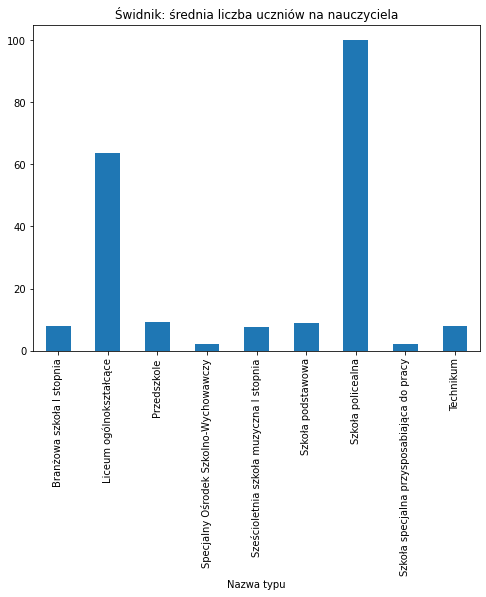

In [20]:
d = filter_stats(d1, 'Świdnik').droplevel(1)
d.plot(kind='bar', y='avg', figsize=(8,6), legend=False)
plt.title('Świdnik: średnia liczba uczniów na nauczyciela')
plt.show()

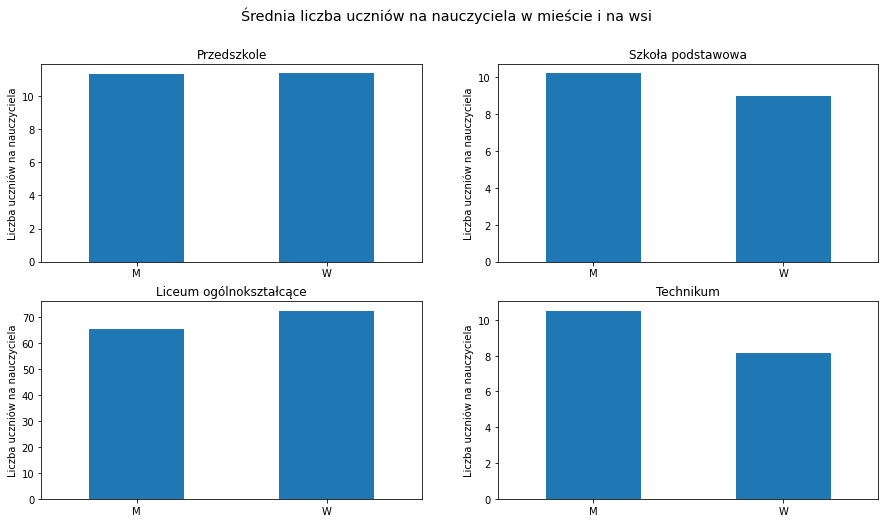

In [21]:
fig, axs = plt.subplots(2, 2)
types = ['Przedszkole', 'Szkoła podstawowa', 'Liceum ogólnokształcące', 'Technikum']
d00 = filter_stats(d2, i2=types[0]).droplevel(1)
d01 = filter_stats(d2, i2=types[1]).droplevel(1)
d10 = filter_stats(d2, i2=types[2]).droplevel(1)
d11 = filter_stats(d2, i2=types[3]).droplevel(1)
lab = 'Liczba uczniów na nauczyciela'
plt.suptitle('Średnia liczba uczniów na nauczyciela w mieście i na wsi', fontsize='x-large')
d00.plot(ax=axs[0, 0], kind='bar', y=['avg'], title=types[0], ylabel=lab, rot=0, figsize=(15, 8), xlabel='', legend=False)
d01.plot(ax=axs[0, 1], kind='bar', y=['avg'], title=types[1], ylabel=lab, rot=0, figsize=(15, 8), xlabel='', legend=False)
d10.plot(ax=axs[1, 0], kind='bar', y=['avg'], title=types[2], ylabel=lab, rot=0, figsize=(15, 8), xlabel='', legend=False)
d11.plot(ax=axs[1, 1], kind='bar', y=['avg'], title=types[3], ylabel=lab, rot=0, figsize=(15, 8), xlabel='', legend=False)
plt.show()

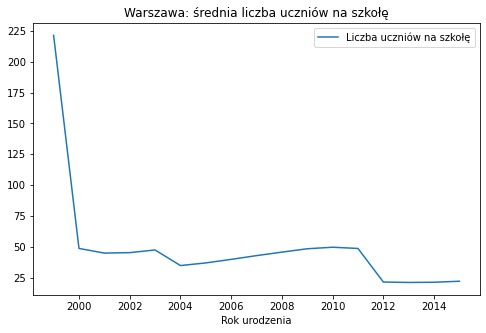

In [22]:
d = filter_stats(d3, 'Warszawa').droplevel(1)
d.plot(title='Warszawa: średnia liczba uczniów na szkołę', figsize=(8,5))
plt.show()

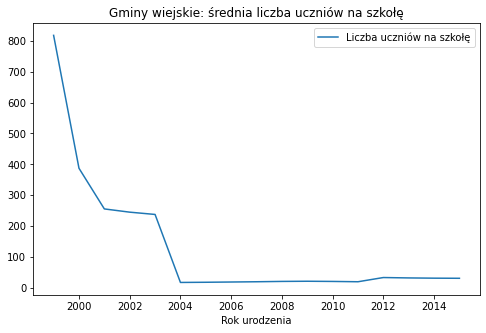

In [24]:
d = filter_stats(d4, 'W')
d.plot(title='Gminy wiejskie: średnia liczba uczniów na szkołę', figsize=(8,5))
plt.show()